In [2]:
import torchvision
import torch
from PIL import Image

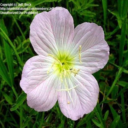

In [3]:
## Create a vector of zeroes of size 5

size = (128, 128)
transform = torchvision.transforms.Compose([torchvision.transforms.Resize(size), torchvision.transforms.ToTensor()])
train_dataset = torchvision.datasets.Flowers102("./flowers", "train", transform=transform, download=True)
test_dataset = torchvision.datasets.Flowers102("./flowers", "test", transform=transform, download=True)

def visualize_image(img: torch.Tensor) -> Image.Image:
    return Image.fromarray((img.permute(1,2,0) * 255).to(torch.uint8).numpy())

visualize_image(train_dataset[1][0])

In [4]:
len(train_dataset) # check how many images there are

# each entry in the dataset has two values..
# the first is a torch tensor which contains the pixel values of the entire image
# the second is a label (0 to 101 to classify each flower)

train_dataset[0] 

(tensor([[[0.0471, 0.0706, 0.0745,  ..., 0.1255, 0.4667, 0.5647],
          [0.0667, 0.0667, 0.0549,  ..., 0.1333, 0.4824, 0.5647],
          [0.0824, 0.0745, 0.0549,  ..., 0.1451, 0.5059, 0.5686],
          ...,
          [0.1059, 0.1059, 0.0863,  ..., 0.5020, 0.4902, 0.4706],
          [0.1137, 0.1137, 0.1294,  ..., 0.5059, 0.4784, 0.4706],
          [0.1020, 0.1176, 0.1176,  ..., 0.5020, 0.4745, 0.4667]],
 
         [[0.0863, 0.1255, 0.1373,  ..., 0.1294, 0.3412, 0.3961],
          [0.0941, 0.1098, 0.1059,  ..., 0.1294, 0.3490, 0.3922],
          [0.0941, 0.0941, 0.0824,  ..., 0.1294, 0.3608, 0.3843],
          ...,
          [0.2000, 0.1804, 0.1333,  ..., 0.4235, 0.4118, 0.3922],
          [0.2118, 0.2039, 0.2000,  ..., 0.4275, 0.4039, 0.3922],
          [0.2078, 0.2196, 0.2196,  ..., 0.4196, 0.4078, 0.3765]],
 
         [[0.0314, 0.0392, 0.0353,  ..., 0.0863, 0.4745, 0.5961],
          [0.0392, 0.0353, 0.0235,  ..., 0.0980, 0.4902, 0.5922],
          [0.0431, 0.0353, 0.0235,  ...,

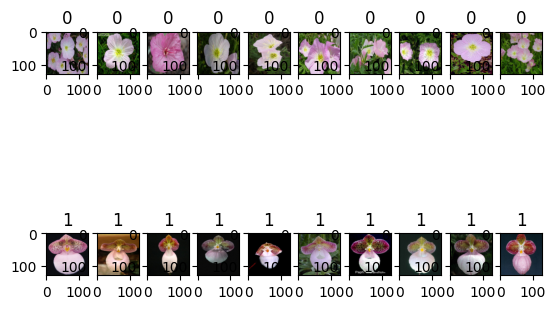

In [5]:
import matplotlib.pyplot as plt

# plt.imshow(visualize_image(train_dataset[1][0]))

f, ax = plt.subplots(2, 10)

# view the first x images, notice that each 10 is a certain class of flower
for i, (im, l) in enumerate(list(train_dataset)[:20]):
    ax[i // 10, i % 10].imshow(visualize_image(im))
    ax[i // 10, i % 10].set_title(l)

### Nearest Neighbor Classifier

$f : \mathbb{R} \to \{0,1\}$

- Input $x$
- Find cosest data point $(\bar{x},l) \in \mathcal{D}$ in dataset $\mathcal{D}$
- Return its label $l$

In [7]:
# train on classes 1 and 2
class_01 = list(train_dataset)[:20]

def nn_classifier(x):
    dist = [((x - im).pow(2).sum(), l) for im, l in class_01]
    # print(dist) # this will show the distances from the test image to all of the training images (and label)
    return min(dist)[1] # return the label of the image with the minimum distance

nn_classifier(test_dataset[0][0])

# test the accuracy of the model
# accuracy = sum(nn_classifier(x) == l for x, l in test_dataset) / len(test_dataset)

# test just the first 20 images
accuracy = sum(nn_classifier(x) == l for x, l in list(test_dataset)[:20]) / 20
accuracy

0.4

### K Nearest Neighbor Classifier

$f : \mathbb{R} \to \{0,1\}$

- Input $x$
- Find $k$ closest data points in dataset $\mathcal{D}$
- Return most common label $l$

In [16]:
def knn_classifier(x, k=3):
    dist = [((x - im).pow(2).sum(), l) for im, l in class_01]
    k_closest = [l for _, l in sorted(dist)[:k]]
    print(k_closest) # notice that the model is now outputting 3 labels instead of 1
    return sorted(k_closest)[k//2] # in the case of 3 classes we can retufn the median. otherwise/usually it would be more complicated to find the most common label    

knn_classifier(test_dataset[0][0])

# test just the first 20 images
accuracy = sum(nn_classifier(x) == l for x, l in list(test_dataset)[:20]) / 20
accuracy

[1, 1, 0]


0.4

#### Note:
These models are having horrible results because raw pixel distances are an awful way to measure likeness of a image.

### K Nearest Neighbor Regression

$f : \mathbb{R} \to \mathbb{R}$

- Input $x$
- Find $k$ closest data points in dataset $\mathcal{D}$
- Return average value

In [33]:
def knn_regression(x, k=3):
    dist = [((x - im).pow(2).sum(), l) for im, l in class_01]
    k_closest = [l for _, l in sorted(dist)[:k]]
    print(k_closest) 
    return torch.mean(torch.tensor(k_closest).float())

knn_regression(test_dataset[0][0])

[1, 1, 0]


tensor(0.6667)